In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

test_datagen = ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

In [4]:
image_size = (128,128)
batch_size = 10

training_data_dir = r'D:\Images\Train'
validation_data_dir = r'D:\Images\Validation'

train_generator=train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=image_size,
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = test_datagen.flow_from_directory(
                                        validation_data_dir,
                                         target_size=image_size,
                                         color_mode='rgb',
                                        class_mode = "categorical")

Found 1607 images belonging to 20 classes.
Found 557 images belonging to 20 classes.


In [5]:
x_batch, y_batch = next(train_generator)

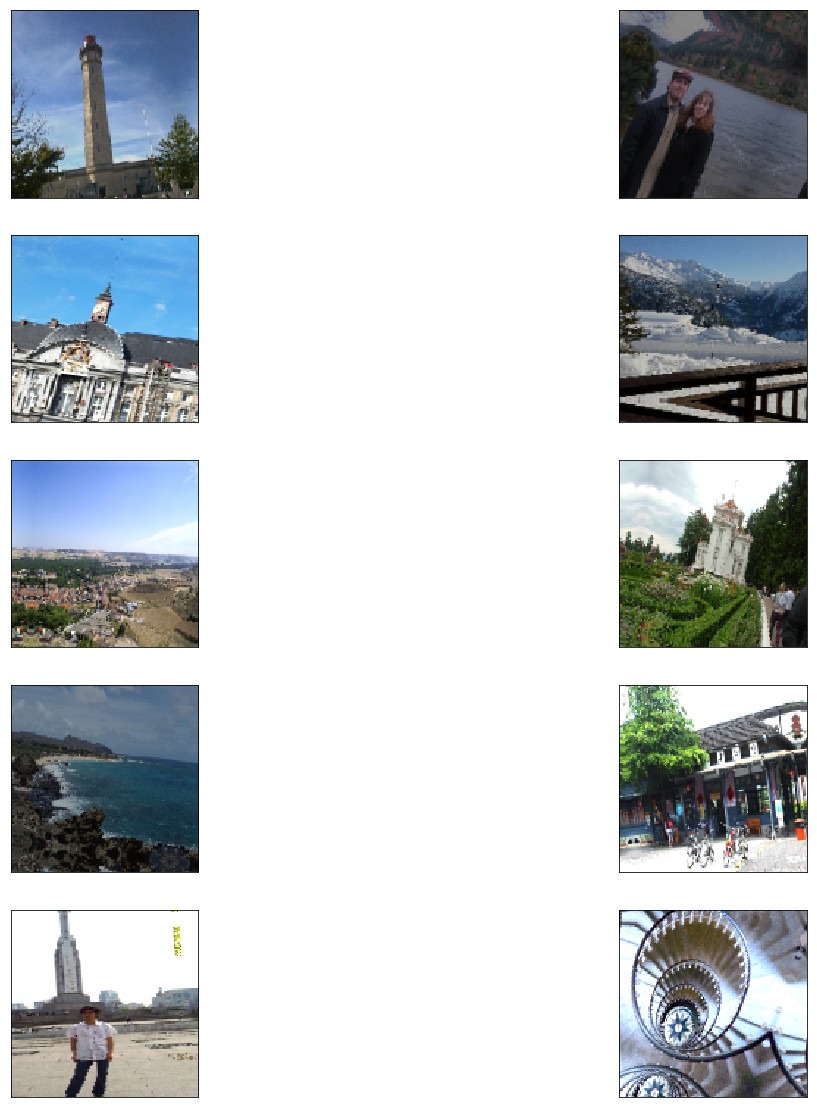

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = x_batch[i]
    image= image.astype(int)
    plt.imshow(image)

In [7]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

In [9]:
base_model = applications.ResNet50(weights = "imagenet", include_top=False, input_shape = (image_size[0], image_size[1], 3))

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 49s 1us/step


In [10]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [11]:
for layer in base_model.layers[:]:
    print(layer.name)

input_1
conv1_pad
conv1
bn_conv1
activation
pool1_pad
max_pooling2d
res2a_branch2a
bn2a_branch2a
activation_1
res2a_branch2b
bn2a_branch2b
activation_2
res2a_branch2c
res2a_branch1
bn2a_branch2c
bn2a_branch1
add
activation_3
res2b_branch2a
bn2b_branch2a
activation_4
res2b_branch2b
bn2b_branch2b
activation_5
res2b_branch2c
bn2b_branch2c
add_1
activation_6
res2c_branch2a
bn2c_branch2a
activation_7
res2c_branch2b
bn2c_branch2b
activation_8
res2c_branch2c
bn2c_branch2c
add_2
activation_9
res3a_branch2a
bn3a_branch2a
activation_10
res3a_branch2b
bn3a_branch2b
activation_11
res3a_branch2c
res3a_branch1
bn3a_branch2c
bn3a_branch1
add_3
activation_12
res3b_branch2a
bn3b_branch2a
activation_13
res3b_branch2b
bn3b_branch2b
activation_14
res3b_branch2c
bn3b_branch2c
add_4
activation_15
res3c_branch2a
bn3c_branch2a
activation_16
res3c_branch2b
bn3c_branch2b
activation_17
res3c_branch2c
bn3c_branch2c
add_5
activation_18
res3d_branch2a
bn3d_branch2a
activation_19
res3d_branch2b
bn3d_branch2b
activat

In [12]:
for layer in base_model.layers[:]:
    layer.trainable = False

In [20]:
classCount = 20

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(4096,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(4096,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(2048,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
preds=Dense(classCount,activation='softmax')(x) #final layer with softmax activation

model_final=Model(inputs=base_model.input,outputs=preds)

In [21]:
model_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [27]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.001, momentum=0.9), metrics=["accuracy"])

In [28]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)

160


In [29]:
class LossAccHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))
        
history = LossAccHistory()

In [30]:
model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=6
                   ,callbacks = [history])

Epoch 1/6
160/160 [==============================] - 160s 1s/step - loss: 1.7710 - acc: 0.5362 - val_loss: 1.6481 - val_acc: 0.5260
Epoch 2/6
160/160 [==============================] - 158s 986ms/step - loss: 0.9490 - acc: 0.7329 - val_loss: 2.0292 - val_acc: 0.4722
Epoch 3/6
160/160 [==============================] - 157s 982ms/step - loss: 0.7181 - acc: 0.7897 - val_loss: 2.1007 - val_acc: 0.5117
Epoch 4/6
160/160 [==============================] - 157s 983ms/step - loss: 0.5774 - acc: 0.8335 - val_loss: 1.5426 - val_acc: 0.6212
Epoch 5/6
160/160 [==============================] - 158s 990ms/step - loss: 0.5292 - acc: 0.8347 - val_loss: 2.2132 - val_acc: 0.5009
Epoch 6/6
160/160 [==============================] - 158s 985ms/step - loss: 0.4450 - acc: 0.8682 - val_loss: 1.4594 - val_acc: 0.6571


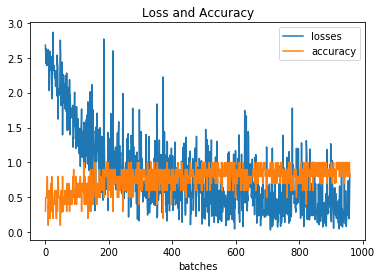

In [31]:
import matplotlib.pyplot as plt
x = range(0, len(history.losses))
plt.plot(x, history.losses)
plt.plot(x, history.accuracy)
plt.xlabel('batches')
plt.title('Loss and Accuracy')
plt.legend(['losses', 'accuracy'])

In [32]:
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='auto')

In [33]:
import time

networkfileName = "D:\GitDeepLearning\ML2\\resnet50_{}.h5".format(int(time.time()))
checkpoint = ModelCheckpoint(networkfileName, monitor='val_acc', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [34]:
history = LossAccHistory()
model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=3
                   ,callbacks = [history, checkpoint, early])

Epoch 1/3
159/160 [============================>.] - ETA: 0s - loss: 0.4501 - acc: 0.8633
Epoch 00001: val_acc improved from -inf to 0.41652, saving model to D:\GitDeepLearning\ML2\resnet50_1547199544.h5
160/160 [==============================] - 165s 1s/step - loss: 0.4493 - acc: 0.8635 - val_loss: 3.1348 - val_acc: 0.4165
Epoch 2/3
159/160 [============================>.] - ETA: 0s - loss: 0.3519 - acc: 0.8868
Epoch 00002: val_acc improved from 0.41652 to 0.48654, saving model to D:\GitDeepLearning\ML2\resnet50_1547199544.h5
160/160 [==============================] - 161s 1s/step - loss: 0.3506 - acc: 0.8875 - val_loss: 2.6126 - val_acc: 0.4865
Epoch 3/3
159/160 [============================>.] - ETA: 0s - loss: 0.3330 - acc: 0.8956
Epoch 00003: val_acc did not improve from 0.48654
160/160 [==============================] - 158s 987ms/step - loss: 0.3348 - acc: 0.8944 - val_loss: 2.8301 - val_acc: 0.4758


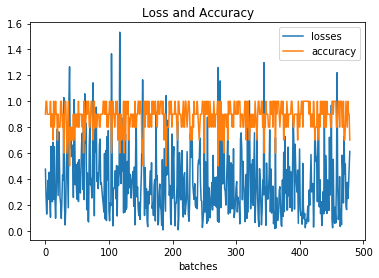

In [35]:
import matplotlib.pyplot as plt
x = range(0, len(history.losses))
plt.plot(x, history.losses)
plt.plot(x, history.accuracy)
plt.xlabel('batches')
plt.title('Loss and Accuracy')
plt.legend(['losses', 'accuracy'])

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# The directory of KNN train data
data_dir = r'C:\DeepLearning\RealImages\Train'

# The neural network model into base_model
base_model = load_model('C:\DeepLearning\TrainingData\ML2\\resnet50_1547199544.h5')

# Cut the customized layers from the read resnet algorithm
x=base_model.get_layer('activation_48').output

# Eport network to one dimension
vector=Flatten()(x)

# Make the model with the whole network as input and the vector as output
model = Model(inputs=base_model.input, outputs=vector)

datagen = ImageDataGenerator()     # Creating the Data generator

# Generator from the images
generator = datagen.flow_from_directory(
        data_dir,
        target_size=(128, 128),
        batch_size=1,
        class_mode='categorical',  # only data, no labels
        shuffle=False)  # keep data in same order as label

Found 10057 images belonging to 100 classes.


In [5]:
import numpy as np

imgsList = []
proccImgs = []
labels = []

# For each image in the generator
for i in range(generator.n):
    (img, lbl) = generator.next();
    
    # Adding the image to the list of images
    #imgsList.append(img)
    
    # Adding the proccessed images to the list of processed imaged
    proccImgs.append(np.reshape(model.predict_on_batch(img), -1))
    
    # Adding the image labels to list of labels
    labels.append(np.argmax(lbl))
    
    print("Adding " + str(i) + " image")
    
#print(labels)

Adding 0 image
Adding 1 image
Adding 2 image
Adding 3 image
Adding 4 image
Adding 5 image
Adding 6 image
Adding 7 image
Adding 8 image
Adding 9 image
Adding 10 image
Adding 11 image
Adding 12 image
Adding 13 image
Adding 14 image
Adding 15 image
Adding 16 image
Adding 17 image
Adding 18 image
Adding 19 image
Adding 20 image
Adding 21 image
Adding 22 image
Adding 23 image
Adding 24 image
Adding 25 image
Adding 26 image
Adding 27 image
Adding 28 image
Adding 29 image
Adding 30 image
Adding 31 image
Adding 32 image
Adding 33 image
Adding 34 image
Adding 35 image
Adding 36 image
Adding 37 image
Adding 38 image
Adding 39 image
Adding 40 image
Adding 41 image
Adding 42 image
Adding 43 image
Adding 44 image
Adding 45 image
Adding 46 image
Adding 47 image
Adding 48 image
Adding 49 image
Adding 50 image
Adding 51 image
Adding 52 image
Adding 53 image
Adding 54 image
Adding 55 image
Adding 56 image
Adding 57 image
Adding 58 image
Adding 59 image
Adding 60 image
Adding 61 image
Adding 62 image
Ad

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Adding 410 image
Adding 411 image
Adding 412 image
Adding 413 image
Adding 414 image
Adding 415 image
Adding 416 image
Adding 417 image
Adding 418 image
Adding 419 image
Adding 420 image
Adding 421 image
Adding 422 image
Adding 423 image
Adding 424 image
Adding 425 image
Adding 426 image
Adding 427 image
Adding 428 image
Adding 429 image
Adding 430 image
Adding 431 image
Adding 432 image
Adding 433 image
Adding 434 image
Adding 435 image
Adding 436 image
Adding 437 image
Adding 438 image
Adding 439 image
Adding 440 image
Adding 441 image
Adding 442 image
Adding 443 image
Adding 444 image
Adding 445 image
Adding 446 image
Adding 447 image
Adding 448 image
Adding 449 image
Adding 450 image
Adding 451 image
Adding 452 image
Adding 453 image
Adding 454 image
Adding 455 image
Adding 456 image
Adding 457 image
Adding 458 image
Adding 459 image
Adding 460 image
Adding 461 image
Adding 462 image
Adding 463 image
Adding 464 image
Adding 465 image
Adding 466 image
Adding 467 image
Adding 468 ima

In [5]:
imgs_file = r'C:\DeepLearning\TrainingData\TestImages\\images.npy'

np.save(imgs_file, imgsList)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

# Fit with KNN algorithm with the proccessed images and labels
neigh.fit(proccImgs, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [9]:
from sklearn.externals import joblib

knn_data = r'C:\DeepLearning\TrainingData\ML2\\knn.sav'

joblib.dump(neigh, knn_data)

['C:\\DeepLearning\\TrainingData\\ML2\\\\knn.sav']